In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [29]:
df = pd.read_csv("TSLA.csv",parse_dates=['Date'])
df.head(5)

Date        Open        High         Low       Close   Adj Close  \
0 2022-04-21  358.243347  364.073334  332.140015  336.260010  336.260010   
1 2022-04-22  338.303345  344.950012  331.333344  335.016663  335.016663   
2 2022-04-25  326.323334  336.206665  325.100006  332.673340  332.673340   
3 2022-04-26  331.809998  333.333344  291.666656  292.140015  292.140015   
4 2022-04-27  299.526672  306.000000  292.453339  293.836670  293.836670   

      Volume  
0  105416400  
1   69696600  
2   68341200  
3  136133700  
4   76956300

In [30]:
df["Date"].dtypes

dtype('<M8[ns]')

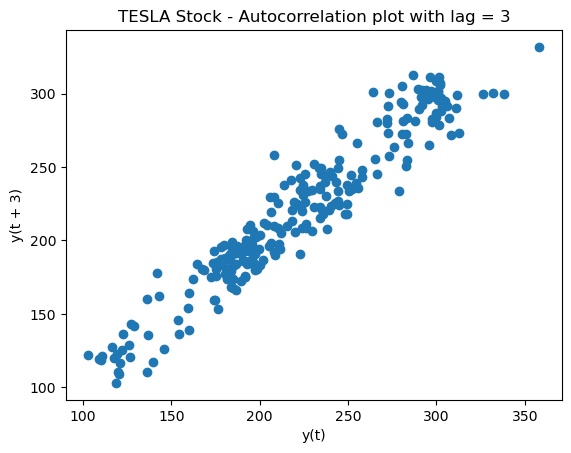

In [38]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
plt.show()

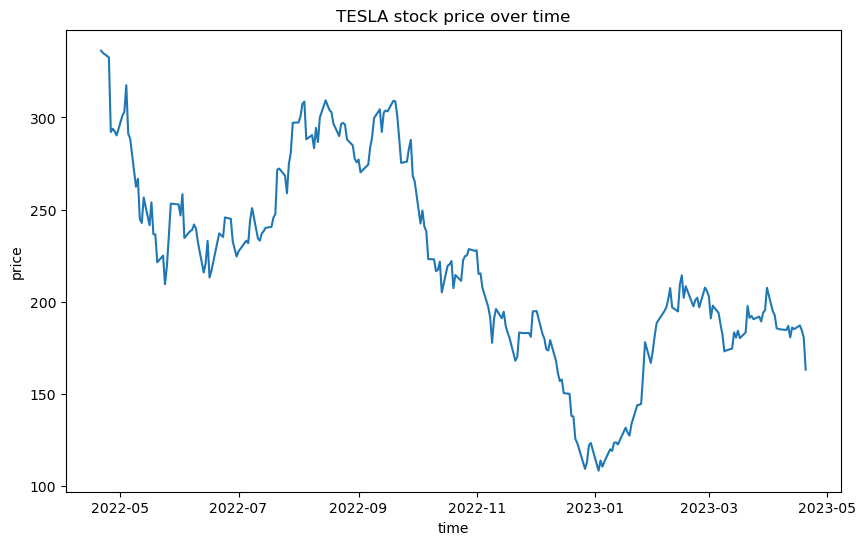

In [39]:
plt.figure(figsize=(10,6))
plt.plot(df["Date"], df["Close"])
plt.title("TESLA stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [42]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,1))#p,q,d
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print(model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

[122.77696955913547, 123.75787981303263, 108.74409621052352, 111.59950193778143, 112.28562257677615, 111.52483849451426, 120.19011058586041, 119.39513756203448, 122.47894954590396, 124.31832847359811, 122.15779185897591, 130.8543175366529, 130.16965064179595, 126.32335780395016, 133.21023880572545, 143.79560937011115, 144.74962415612782, 143.97481055240243, 159.66413717390589, 178.90172078504142, 168.52360531653798, 171.49792772075338, 182.92535658870298, 187.57677632845085, 190.9529221188502, 194.84531834779474, 197.55525576534552, 201.1476537615187, 207.76681559965334, 198.08732722234777, 193.66074619944277, 208.8538748077882, 214.70133497198088, 202.7309031573498, 207.8541488183294, 199.1937046717087, 198.42674792439064, 203.30154239457832, 196.37391487099046, 206.70088345673113, 207.0481441569942, 202.22059154894296, 192.2174473386199, 195.96114462788984, 194.98081380567467, 186.80128965232814, 182.55974633494645, 172.7289920168839, 172.3007559649218, 174.382900175131, 182.24965184

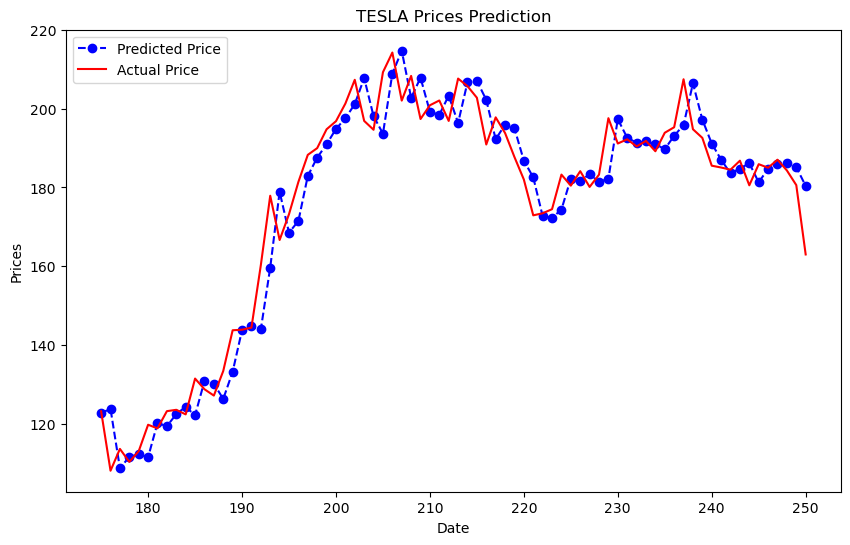

In [44]:
plt.figure(figsize=(10,6))
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()